# Ni'ma Tusyafa'ah PYTN-KS19-015
# Python for Data Science by Hacktiv8
# Final Project 4 - Clustering
# Kelompok 1

### Perkenalan
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

Outline Notebook:

1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan

### Projects Overview

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.


### Attribute Information:

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user


### Objektif

Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

1. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan Clustering pada data yang diberikan

Dataset Link : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/

## IMPORT LIBRARIES

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

1. import pandas as pd : Digunakan untuk manipulasi dan analisis data.
2. import numpy as np : Untuk operasi numerik dan manipulasi array.
3. import matplotlib.pyplot as plt : Library untuk membuat visualisasi grafik.
4. import seaborn as sns :  Library untuk membuat visualisasi statistik yang menarik.
5. from sklearn.model_selection import train_test_split :  Digunakan untuk membagi dataset menjadi data pelatihan dan data pengujian. 
6. from sklearn.preprocessing import StandardScaler : Untuk melakukan penskalaan fitur.
7. from sklearn.impute import SimpleImputer : Digunakan untuk mengisi nilai-nilai yang hilang dalam dataset.
8. from sklearn.pipeline import Pipeline : Membuat pipeline untuk menggabungkan beberapa langkah preprocessing.
9. from sklearn.compose import ColumnTransformer :  Memungkinkan untuk menerapkan transformer secara selektif pada kolom tertentu.
10. from sklearn.ensemble import RandomForestRegressor : Algoritma RandomForest untuk masalah regresi
11. from sklearn.metrics import accuracy_score, confusion_matrix, classification_report : Metrik evaluasi klasifikasi.
12. from sklearn.model_selection import cross_val_score :  Digunakan untuk melakukan validasi silang pada model.
13. from sklearn.linear_model import LogisticRegression : Model klasifikasi yang akan digunakan.
14. from sklearn.neighbors import KNeighborsClassifier : Model klasifikasi yang akan digunakan.
15. from sklearn.svm import SVC
16. from sklearn.naive_bayes import GaussianNB : Model klasifikasi yang akan digunakan.
17. from sklearn.tree import DecisionTreeClassifier : Model klasifikasi yang akan digunakan.
18. import warnings warnings.filterwarnings('ignore') : Mengabaikan peringatan yang mungkin muncul selama eksekusi kode.

Library di atas akan digunakan untuk membersihkan, eksplorasi, dan memproses data, serta untuk melatih dan menguji model-model machine learning.

## DATA LOADING

In [243]:
df = pd.read_csv("CC GENERAL.csv")

**df = pd.read_csv('CC GENERAL.csv')** : digunakan untuk membaca dataset dari file CSV 'weatherAUS.csv' dan menyimpannya dalam sebuah objek DataFrame yang dinamai 'df'.

In [244]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**df.head()** : digunakan untuk menampilkan lima baris pertama dari DataFrame 'df'.

In [245]:
df.shape

(8950, 18)

**df.shape** : digunakan untuk mengambil informasi tentang jumlah baris dan kolom dalam dataset yang disimpan dalam objek DataFrame 'df'. df.shape mengembalikan tuple dengan dua angka. Angka pertama dalam tuple adalah jumlah baris (entries) dalam dataset, dan angka kedua adalah jumlah kolom (fitur) dalam dataset

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**df.info()** : digunakan untuk mendapatkan informasi yang lebih rinci tentang DataFrame df_HeartFailure termasuk jumlah nilai non-null, tipe data setiap kolom, dan penggunaan memori.

## DATA CLEANING

In [247]:
df['BALANCE'].fillna(df['BALANCE'].median(), inplace=True)

**Program di atas** digunakan untuk mengisi nilai yang hilang (missing values) pada kolom 'BALANCE' dalam suatu DataFrame (df) menggunakan nilai median dari kolom tersebut.

In [248]:
max_limit = df['BALANCE'].quantile(0.95)
df.loc[df['BALANCE'] > max_limit, 'BALANCE'] = max_limit

**Program diatas** : Pada baris pertama digunakan untuk menghitung kuantil ke-95% dari kolom 'BALANCE'. Kuantil ke-95% adalah nilai di mana 95% data 'BALANCE' berada di bawahnya. Nilai ini disimpan dalam variabel max_limit. Pada baris kedua digunakan untuk menetapkan nilai max_limit pada semua baris di kolom 'BALANCE' yang memiliki nilai di atas max_limit. Ini berarti semua nilai yang lebih besar dari nilai max_limit akan diganti dengan nilai max_limit.

In [249]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

**df.isnull().any()** : digunakan untuk mengecek apakah ada nilai null (kosong) dalam setiap kolom DataFrame df

In [250]:
df.duplicated().any()

False

**df.duplicated().any()** : digunakan untuk mengecek apakah ada setidaknya satu baris duplikat dalam DataFrame (df) dan pada output diatas menunjukkan bahwa tidak terdapat baris duplikat dalam DataFrame

In [251]:
df.duplicated().value_counts()

False    8950
Name: count, dtype: int64

**df.duplicated().value_counts()** : digunakan untuk menghitung jumlah baris duplikat dan non-duplikat dalam DataFrame (df) dan pada output diatas terdapat 8636 nilai false yang artinya 8636 baris non-duplikat

In [252]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**df.isnull().sum()** : Digunakan untuk menunjukkan jumlah nilai null dalam setiap kolom dataset.

In [253]:
df.dropna(subset='CREDIT_LIMIT', inplace=True)
df.dropna(subset='MINIMUM_PAYMENTS', inplace=True)

**Program diatas** digunakan untuk menghapus baris-baris (entries) di DataFrame (df) di mana kolom 'CREDIT_LIMIT' atau 'MINIMUM_PAYMENTS' memiliki nilai yang hilang (NaN).

In [254]:
df.select_dtypes(include=float).columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

**df.select_dtypes(include=float).columns** : Digunakan untuk mengembalikan daftar kolom-kolom dalam DataFrame (df) yang memiliki tipe data float.

In [255]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**df.isnull().sum()** : digunakan untuk menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame df

In [256]:
df.select_dtypes(include=float).columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

**df.select_dtypes(include=float).columns** digunakan untuk mengambil daftar kolom-kolom dalam DataFrame (df) yang memiliki tipe data float.

In [257]:
for col in df.select_dtypes(include=float).columns:
    df[col].fillna(df[col].median(), inplace=True)

**Program di atas** digunakan untuk mengisi nilai yang hilang (NaN) dalam kolom-kolom numerik (tipe data float) pada DataFrame df dengan nilai median dari masing-masing kolom.

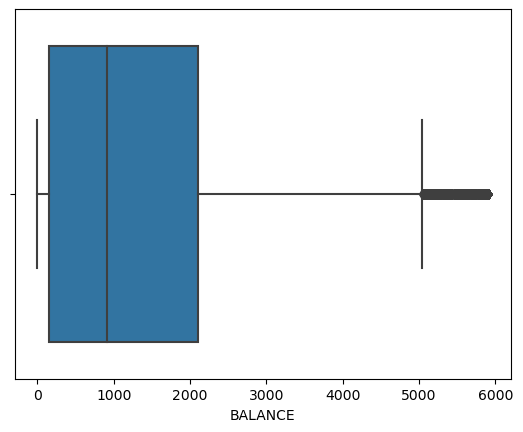

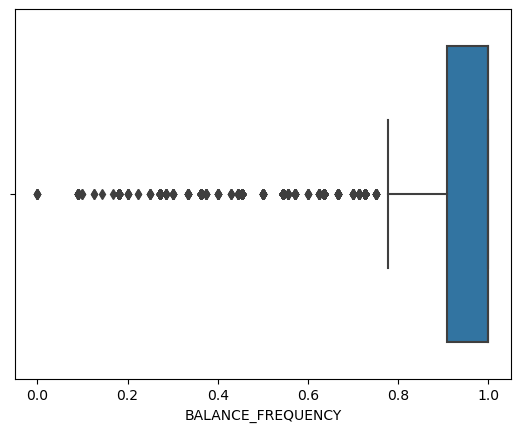

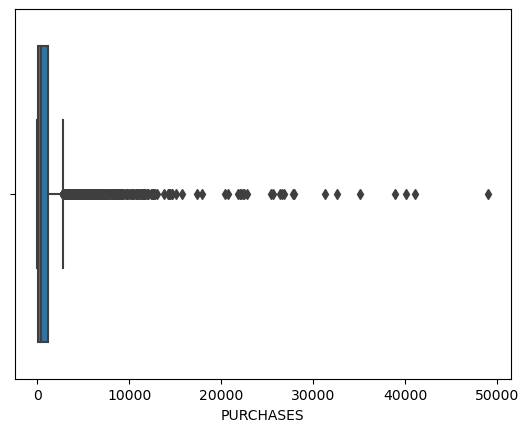

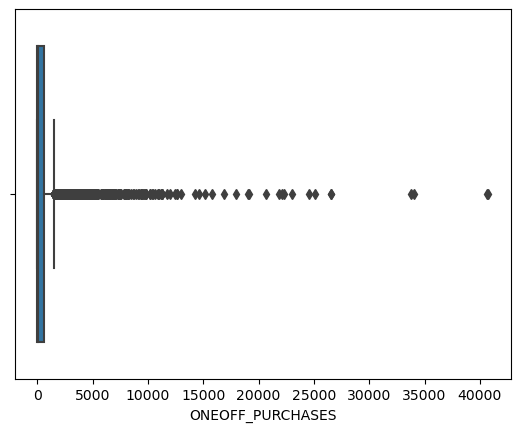

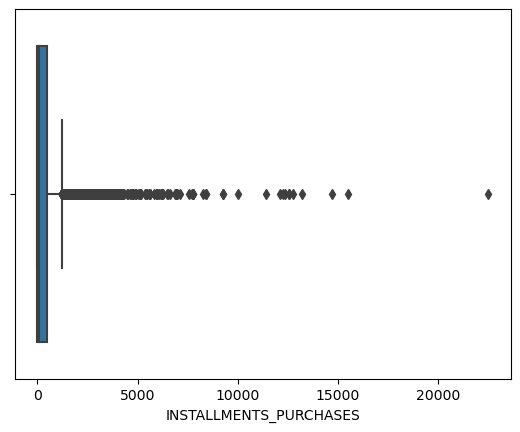

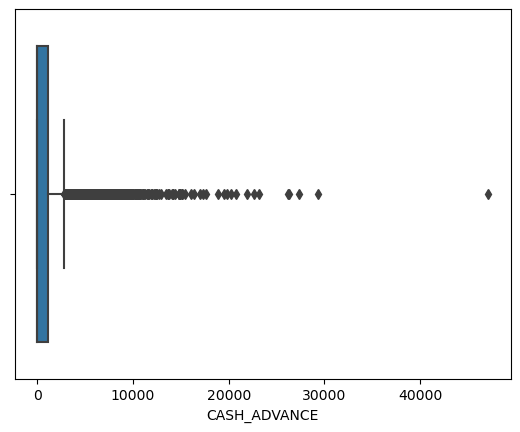

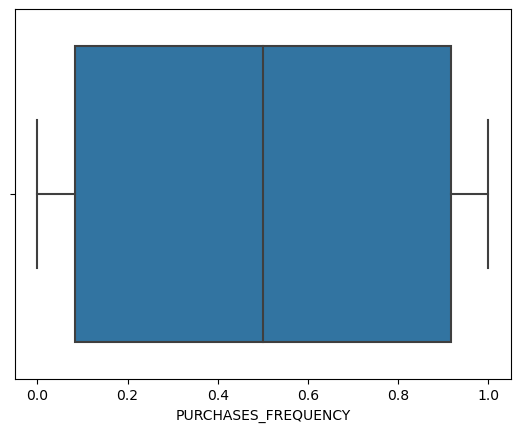

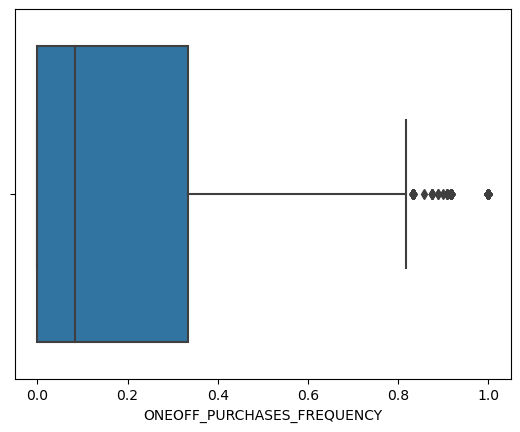

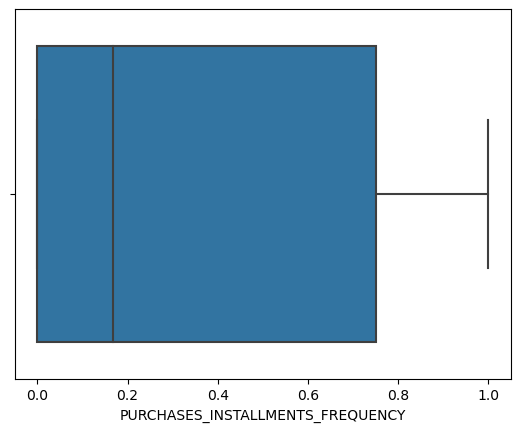

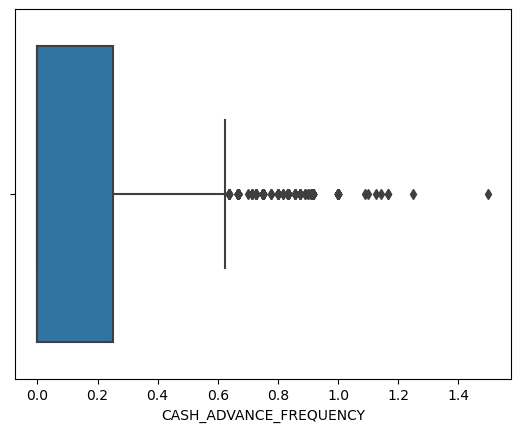

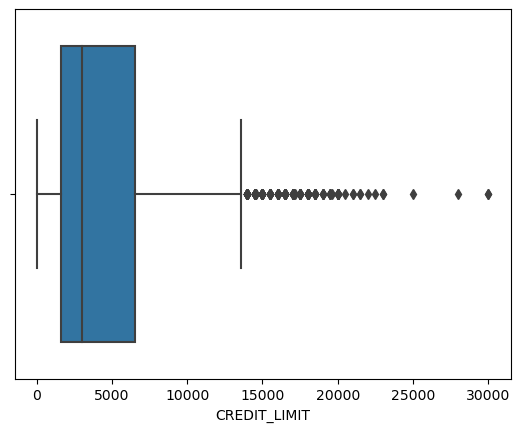

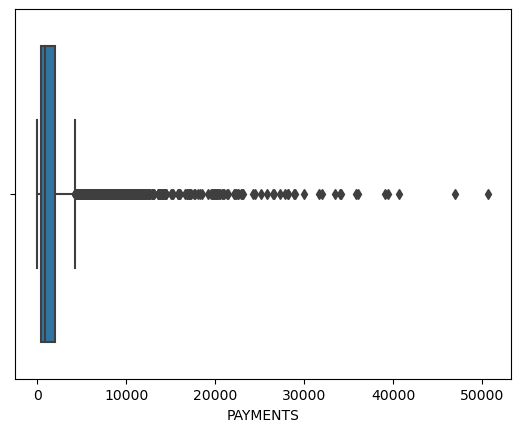

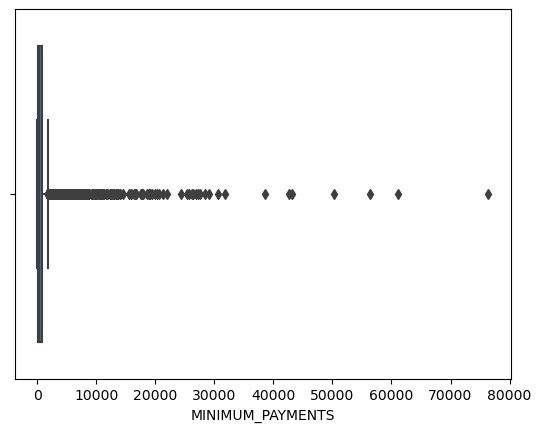

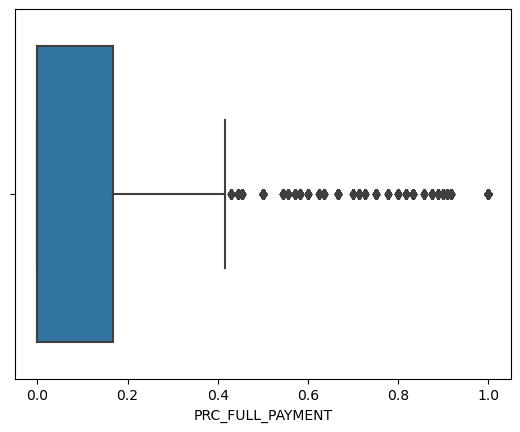

In [258]:
for col in df.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=df[col])
plt.show()

**Program diatas** digunakan untuk membuat boxplot (diagram kotak) untuk setiap kolom numerik (tipe data float) dalam DataFrame df menggunakan library seaborn (sns), dan terdapat banyak outlier pada setiap kolom

In [259]:
df_float = df[df.select_dtypes(include=float).columns]

# Print shape lama dari dataset yang belum di handling outliernya
print("Bentuk Shape Lama: ", df_float.shape)

# IQR
# Kalkulasi batas atas dan bawah
Q1 = df[df.select_dtypes(include=float).columns].quantile(0.25)
Q3 = df[df.select_dtypes(include=float).columns].quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

# Membuat array dengan nilai boolean yang menunjukkan baris-baris yang merupakan outlier
upper_array = (df_float > upper).any(axis=1)
lower_array = (df_float < lower).any(axis=1)

# Menghapus outlier dari df_float
df_float = df_float[~upper_array]
df_float = df_float[~lower_array]

# Print shape baru dari dataset yang sudah di handling outliernya
print("Bentuk Shape Baru: ", df_float.shape)

Bentuk Shape Lama:  (8636, 14)
Bentuk Shape Baru:  (3651, 14)


**Program diatas** digunakan untuk menghapus nilai outlier dari DataFrame df_float dan mencetak bentuk DataFrame sebelum dan sesudah penanganan outlier dan adapun pendekatan yang digunakan di sini yaitu dengan mengidentifikasi nilai outlier menggunakan metode IQR (Interquartile Range) dan menghapus baris yang memiliki nilai outlier pada setidaknya satu kolom numerik.

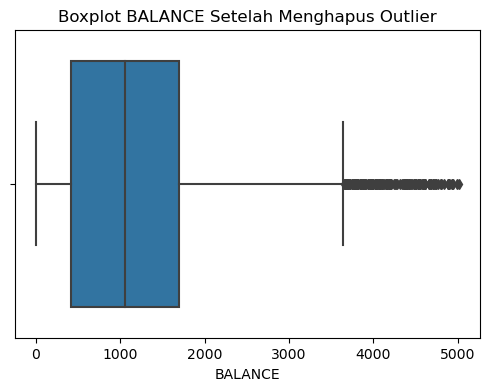

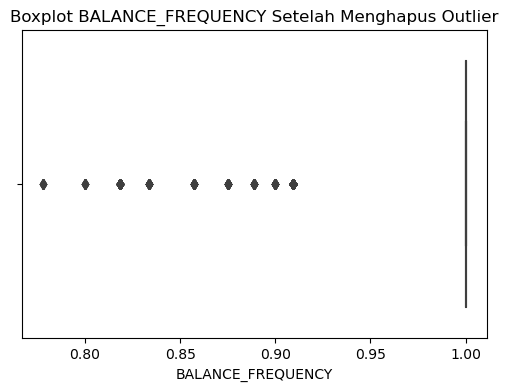

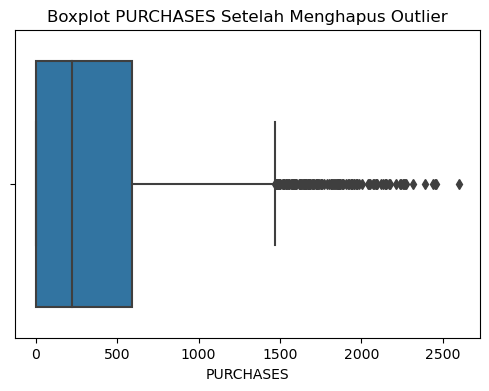

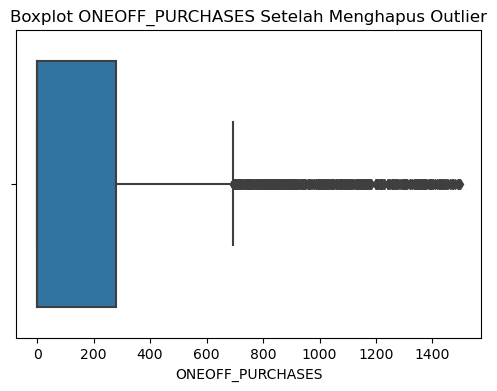

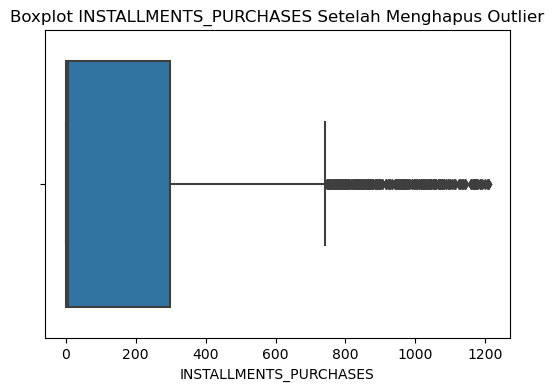

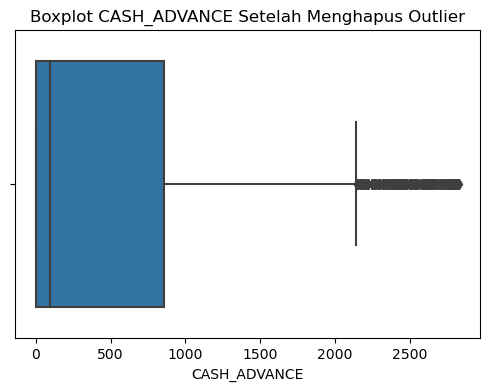

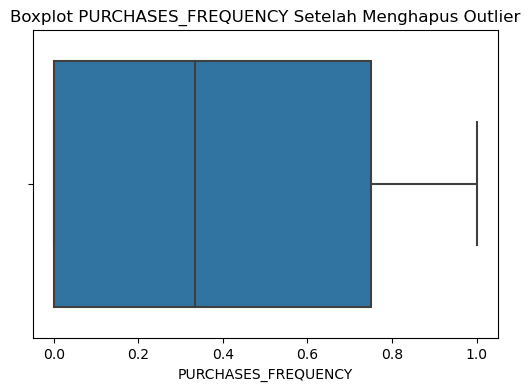

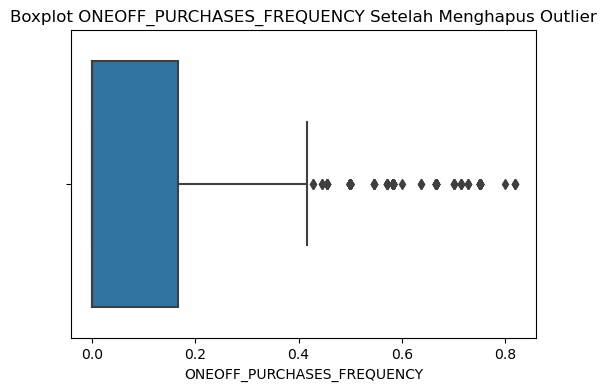

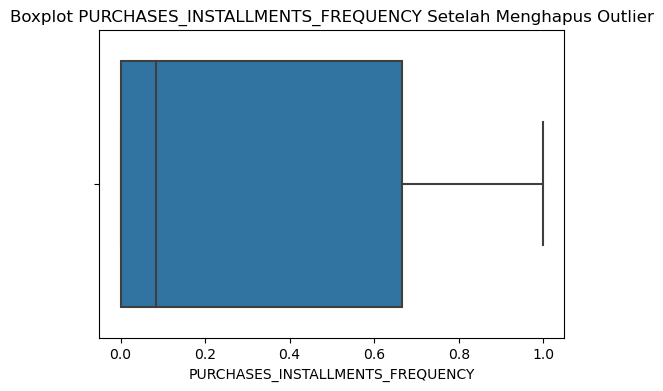

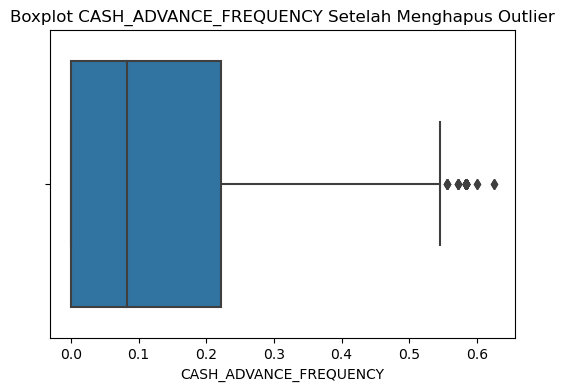

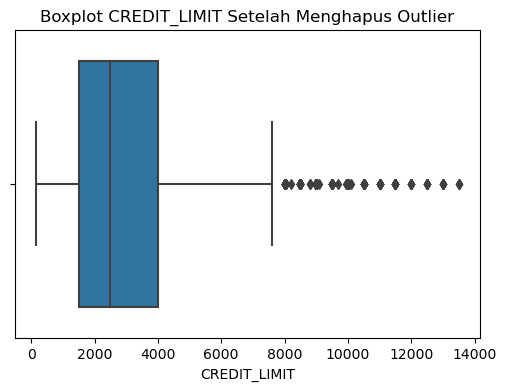

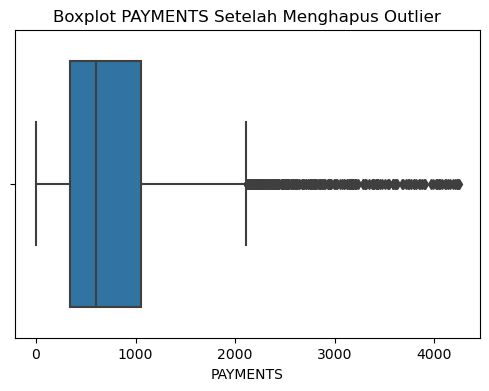

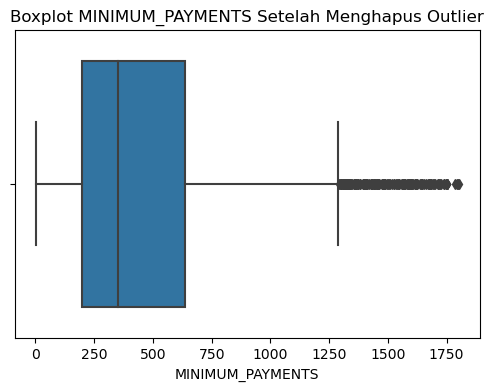

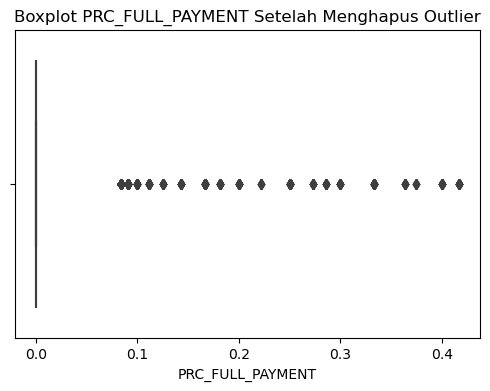

In [260]:
for col in df_float.columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=df_float[col])
    plt.title(f"Boxplot {col} Setelah Menghapus Outlier") 
    plt.show()

Dapat dilihat pada output di atas memiliki cukup perubahan mengenai banyaknya outlier pada setiap kolom dari output sebelumnya

In [261]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1485.417601,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,1695.022449,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,5909.111808,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**df.describe()** digunakan untuk menghasilkan ringkasan statistik deskriptif untuk setiap kolom numerik dalam DataFrame df juga dapat memberikan informasi statistik penting.

## EXPLARATORY DATA ANALYSIS

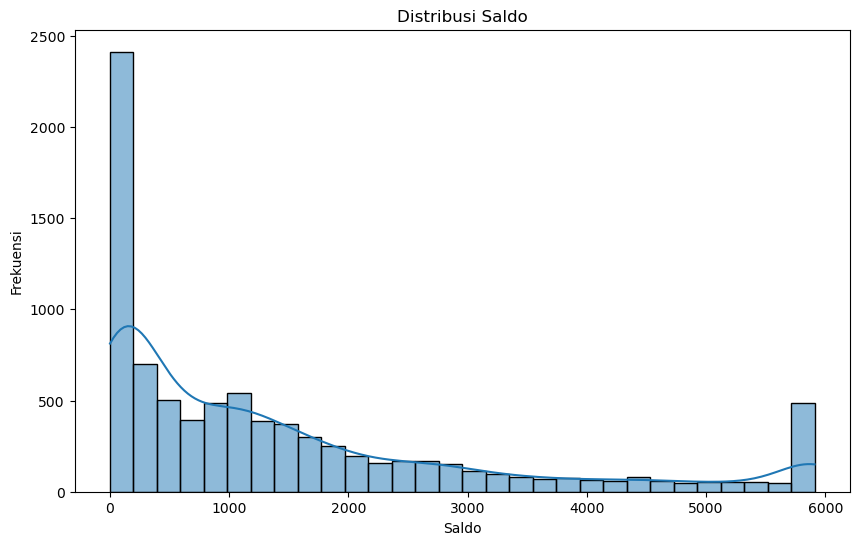

In [262]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Distribusi Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frekuensi')
plt.show()

**Program diatas** digunakan untuk membuat histogram dari kolom 'BALANCE' dalam DataFrame df menggunakan library seaborn (sns) dan pada output diatas menunjukkan bahwa balok yang paling dekat dengan angka 0 adalah yang tertinggi dengan frekuensi 2400

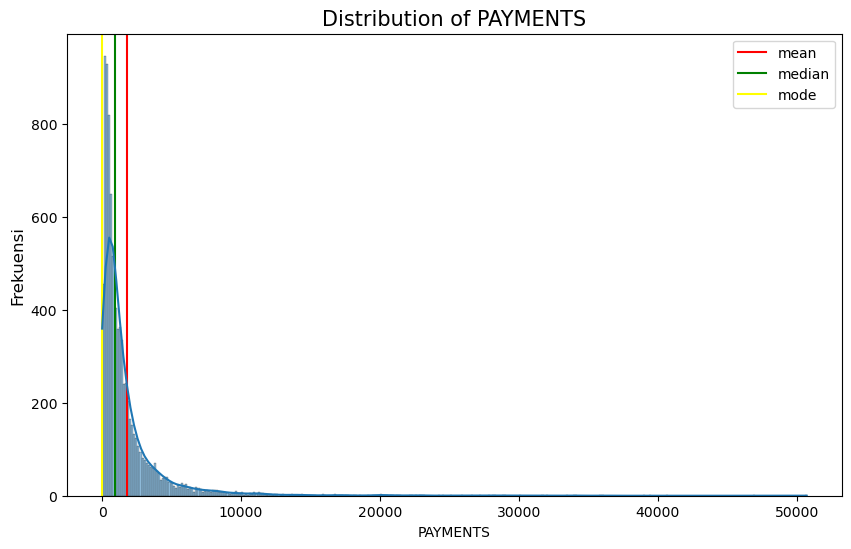

In [263]:
plt.figure(figsize = (10, 6))
plt.title("Distribution of PAYMENTS", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df['PAYMENTS'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['PAYMENTS'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df['PAYMENTS'].mode()[0], color = 'yellow', label = 'mode')
sns.histplot(df['PAYMENTS'], kde=True)
plt.legend()

**Program diatas** digunakan untuk membuat visualisasi distribusi data dari kolom 'PAYMENTS' dalam DataFrame df menggunakan matplotlib dan seaborn. Pada output diatas dapat dilihat bahwa visualisasi distribusi pada kolom 'PAYMENTS' tertinggi berada di frekuensi 1000

In [264]:
yes = len(df[df['BALANCE_FREQUENCY'] == 1])
no = len(df[df['BALANCE_FREQUENCY'] == 0])

**Program diatas** digunakan untuk menghitung jumlah kemunculan nilai 1 dan 0 dalam kolom 'BALANCE_FREQUENCY' dari DataFrame df, variabel yes akan berisi jumlah kemunculan nilai 1 dalam kolom 'BALANCE_FREQUENCY', dan variabel no akan berisi jumlah kemunculan nilai 0.

In [265]:
df['BALANCE'].value_counts()

BALANCE
5909.111808    444
0.000000         6
387.967458       1
91.011429        1
179.293260       1
              ... 
791.117673       1
4075.540208      1
2600.500163      1
2900.590880      1
372.708075       1
Name: count, Length: 8188, dtype: int64

**df['BALANCE'].value_counts()** digunakan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom 'BALANCE' dalam DataFrame df

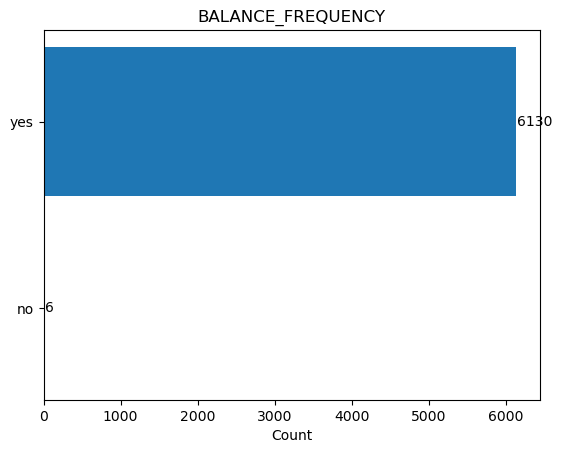

In [266]:
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('yes', 'no')
y_total = np.arange(len(y))
x = (yes, no)
ax.barh(y_total, x, align='center')
ax.set_yticks(y_total)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('BALANCE_FREQUENCY')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

**Program diatas**  digunakan untuk membuat diagram batang horizontal (horizontal bar chart) yang menunjukkan jumlah kemunculan nilai 'yes' dan 'no' dalam kolom 'BALANCE_FREQUENCY' dari DataFrame df. Pada output diatas dapat dilihat bahwa pada kolom yes terdapat 6130 sedangkan pada kolom no hanya terdapat 6 yang artinya saldo lebih sering di perbarui 

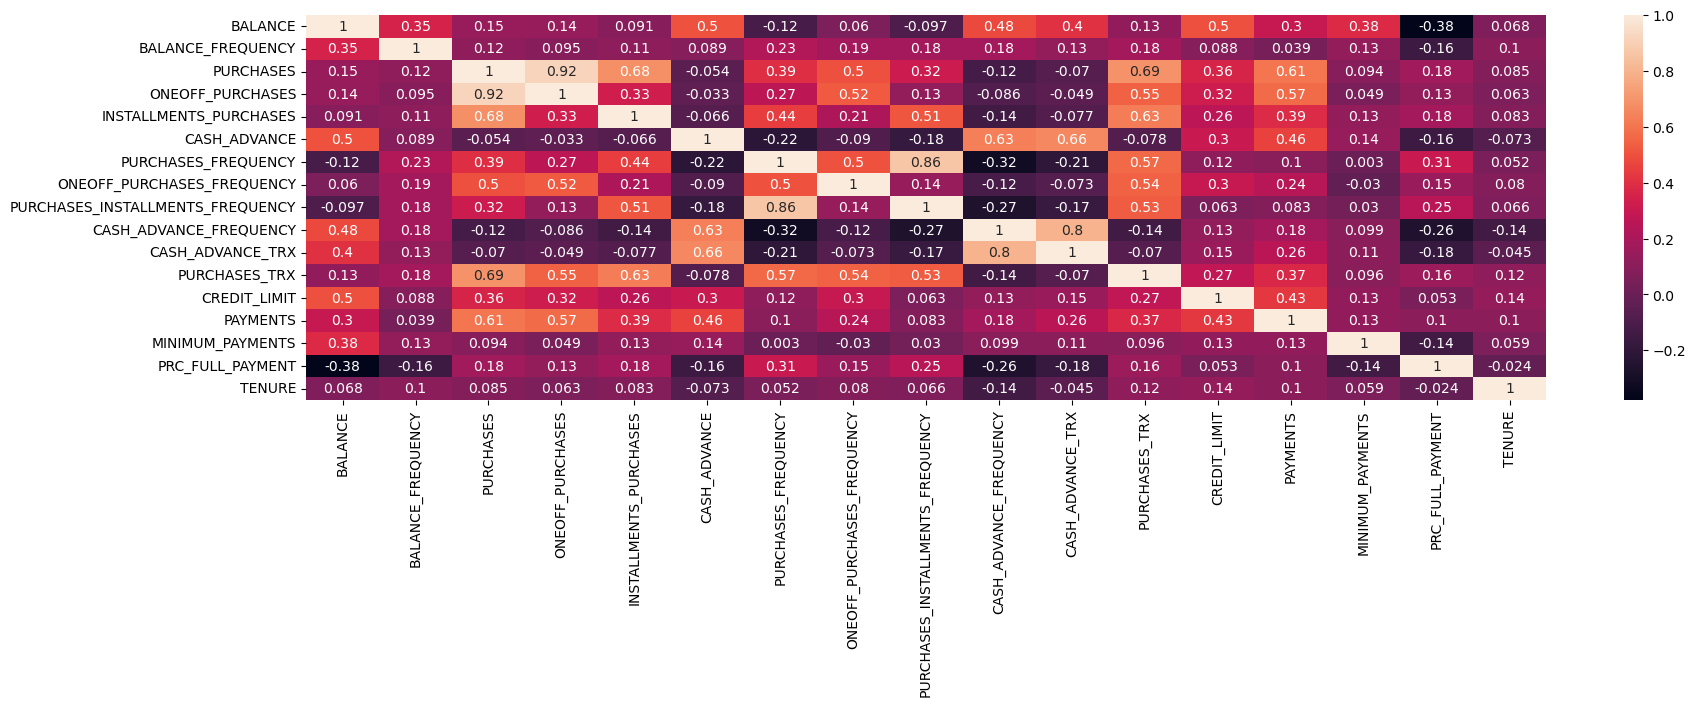

In [267]:
# Mengubah data integer ke float
df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']] = df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']].astype(float)

plt.figure(figsize=(20, 5))

# Memilih kolom-kolom berjenis data float dari DataFrame
numeric_columns = df.select_dtypes(include=['float']).columns

# Membuat matriks korelasi untuk kolom-kolom numerik
correlation_matrix = df[numeric_columns].corr()

# Membuat heatmap dengan Seaborn
sns.heatmap(correlation_matrix, annot=True)

# Menampilkan heatmap
plt.show()

**Program diatas** digunakan untuk melakukan beberapa tindakan dalam konteks visualisasi dan analisis korelasi antar kolom-kolom numerik dalam DataFrame df

## DATA PREPROCESSING

In [268]:
X = df.drop(['BALANCE'], axis=1)
y = df['BALANCE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program diatas** digunakan sebagai langkah-langkah umum dalam pemisahan dataset menjadi data pelatihan (training data) dan data pengujian (testing data) untuk digunakan dalam pembuatan model dan evaluasinya.

In [269]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

**Program diatas** memberikan fleksibilitas dalam menangani nilai yang hilang dan penskalaan fitur numerik, dan ini adalah langkah umum dalam persiapan data sebelum dilibatkan dalam model machine learning.

## MODELLING

In [270]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

**Program diatas** adalah suatu pipeline yang melibatkan pra-pemrosesan data dan model machine learning dalam satu rangkaian. Pipeline ini memungkinkan Anda untuk memanggil metode fit() dan predict() pada keseluruhan pipeline tanpa harus melakukan pra-pemrosesan dan pemodelan secara terpisah. 

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program diatas** digunakan sebagai langkah-langkah untuk membagi dataset menjadi data pelatihan (training data) dan data pengujian (testing data) menggunakan fungsi train_test_split dari scikit-learn. 

In [272]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BALANCE_FREQUENCY',
                                                   'PURCHASES',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'PURCHASES_FREQUENCY',
                                                   'ONEOFF_PURCHASES_FREQUENCY',
                                                   'PURCHASES_INSTALLMENTS_FREQUENCY',
                                                   'CASH_ADVANCE_FREQUENCY',
                                                   'CASH_ADVANCE_TRX',
                                                   'PURCHASES_TRX',
                                                   'CREDIT_LIMIT', 'PAYMENTS',
                                                   'MINIMUM_PAYMENTS',
                                                   'PRC_FULL_PAYMENT',
                                                   'TENURE'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

**model_rf.fit(X_train, y_train)** digunakan untuk melatih model regresi menggunakan data pelatihan (X_train dan y_train).

## EVALUASI MODEL

In [273]:
y_pred_rf = model_rf.predict(X_test)

**y_pred_rf = model_rf.predict(X_test)** digunakan untuk melakukan prediksi pada data pengujian (X_test) menggunakan model regresi yang telah dilatih (model_rf)

In [274]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 125847.14833959192


**Program diatas** digunakan untuk mengukur Mean Squared Error (MSE), suatu metrik evaluasi kinerja regresi, antara nilai sebenarnya (y_test) dan nilai prediksi (y_pred_rf)

## PENGAMBILAN KEPUTUSAN

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

1. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut yang didalamnya berisi informasi tentang jumlah pembelian maksimum, jumlah pembelian minimum, batas kartu kredit, dll.  Dikarenakan tujuan utama dalam projek ini adalah untuk memprediksi sisa saldo maka fitur BALANCE merupakan variabel dependent yang akan menjadi predictand.
2. Pada selection EDA bisa dilihat bahwa balok tertinggi berada di kisaran angka 200 yang artinya sisa saldo berada dikisaran angka 200
3. Model telah berhasil digunakan untuk memprediksi dengan angka 125847.14833959192